<a href="https://colab.research.google.com/github/Rohit2303A510J0/ADM/blob/main/LAB3_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import sklearn
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [12]:
diabetes = load_diabetes()

In [13]:
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data, columns=column_name)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: ylabel='bmi'>

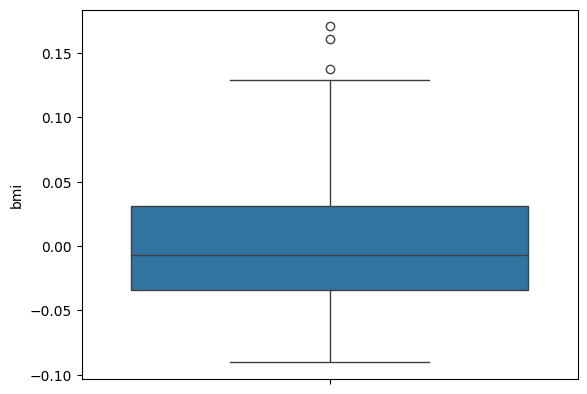

In [14]:
sns.boxplot(df_diabetes['bmi'])

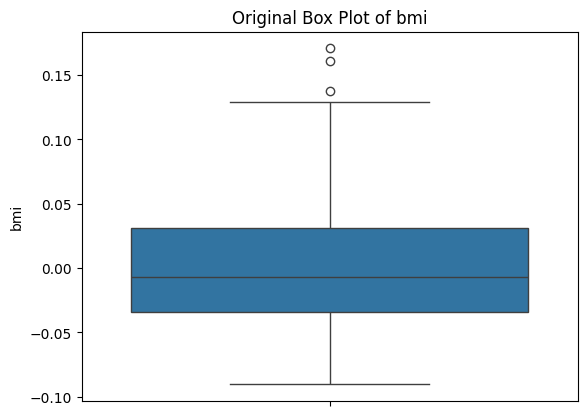

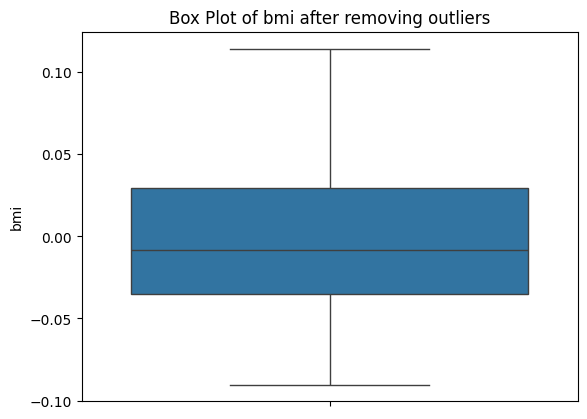

In [16]:
def removal_box_plot(df, column, threshold):
  sns.boxplot(df[column])
  plt.title(f'Original Box Plot of {column}')
  plt.show()

  removed_outliers = df[df[column] <= threshold]

  sns.boxplot(removed_outliers[column])
  plt.title(f'Box Plot of {column} after removing outliers')
  plt.show()

  return removed_outliers

threshold_value = 0.12
no_outliers = removal_box_plot(df_diabetes, 'bmi', threshold_value)

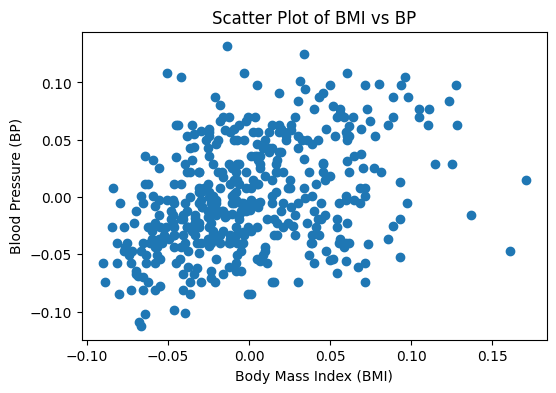

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetes['bmi'], df_diabetes['bp'])
ax.set_xlabel('Body Mass Index (BMI)')
ax.set_ylabel('Blood Pressure (BP)')
ax.set_title('Scatter Plot of BMI vs BP')
plt.show()

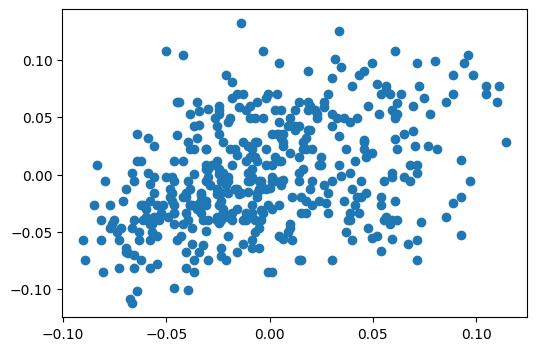

In [19]:
outlier_indics = np.where((df_diabetes['bmi'] > 0.12) & (df_diabetes['bp'] < 0.8))

no_outliers = df_diabetes.drop(outlier_indics[0])

fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
plt.show()

In [21]:
z = np.abs(stats.zscore(df_diabetes['age']))
print(z)

0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


In [22]:
outlier_indices = np.where(z > 2)[0]
no_outliers = df_diabetes.drop(outlier_indices)
print(no_outliers)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [24]:
q1 = np.percentile(df_diabetes['bmi'], 25, method='midpoint')

q3 = np.percentile(df_diabetes['bmi'], 75, method='midpoint')

iqr = q3 - q1

print(iqr)

0.06520763046978838


In [25]:
upper = q3 + 1.5 * iqr
upper_array = np.array(df_diabetes['bmi'] >= upper)
print("Upper Bound is :", upper)
print("---------------------")
print(upper_array.sum())

Upper Bound is : 0.12879000811776306
---------------------
3


In [26]:
lower = q1 - 1.5 * iqr
lower_array = np.array(df_diabetes['bmi'] <= lower)
print("Lower Bound is :", lower)
print("---------------------")
print(lower_array.sum())

Lower Bound is : -0.13204051376139045
---------------------
0
